Data Science - EA8: ML Introduction Exercise

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load fish dataset
data = pd.read_csv('./data/fish.csv')

# Display first few rows of the dataset
print(data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Data Preparation

In [43]:
# Check for missing values
print(data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [44]:
# Check data types
print(data.dtypes)

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


In [45]:

# Summary
print(data.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


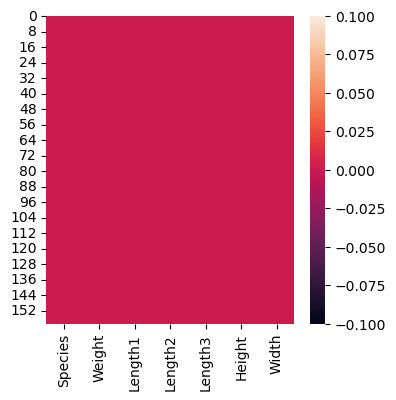

In [46]:
# Plotting heatmap to show correlations
plt.figure(figsize=[4, 4])
sns.heatmap( data.isna())
plt.show()

Task 1

Linear Regression - RMSE: 87.15263646317094, R2: 0.9379921317795369
Random Forest - RMSE: 59.114636438879735, R2: 0.9714717068999104


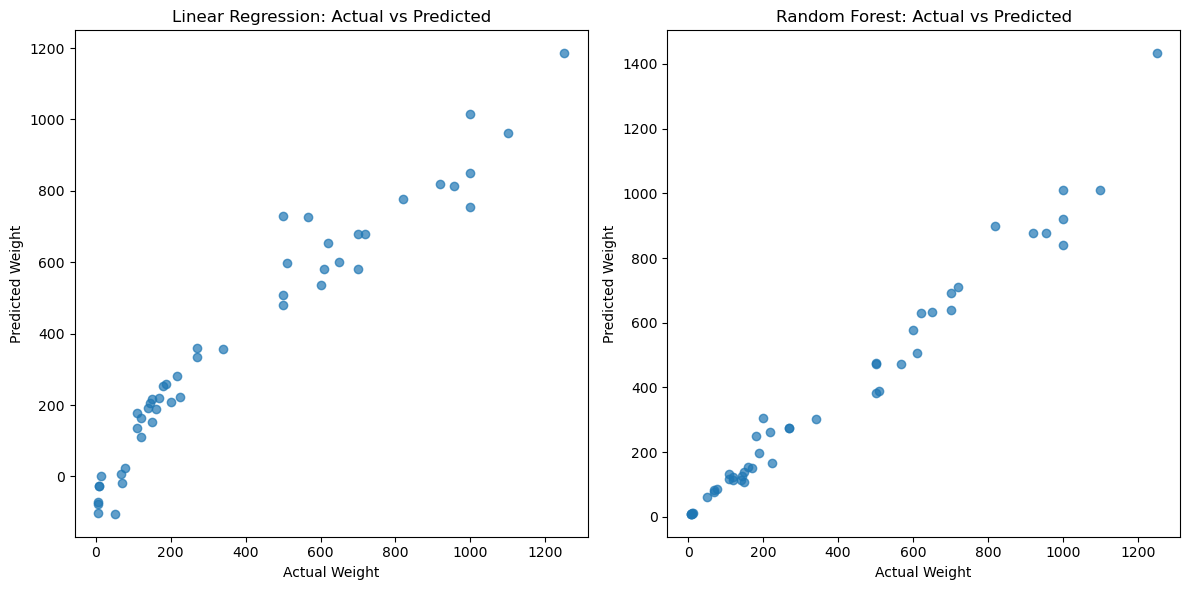

In [47]:
# Task 1.1: Splitting Dataset Randomly

# Splitting dataset into features and target variable
X = data.drop('Weight', axis=1)
y = data['Weight']

# One-hot encode the categorical variable 'Species'
X = pd.get_dummies(X, columns=['Species'], drop_first=True)

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 1.2: Applying Models
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Linear Regression Predictions
y_pred_lr = linear_regressor.predict(X_test)

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Random Forest Predictions
y_pred_rf = rf_regressor.predict(X_test)

# Task 1.3: Calculate RMSE and R2
# Linear Regression metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - RMSE: {rmse_lr}, R2: {r2_lr}")
print(f"Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}")

# Task 1.4: Visualize Predictions
# Visualizing Linear Regression predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Linear Regression: Actual vs Predicted')

# Visualizing Random Forest predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

Task 1.5: Provide your opinion on which metric, RMSE or R², is more appropriate in this case.

For the specific task of predicting fish weight, RMSE might be more appropriate because it provides a clear measure of the prediction error in grams, which is directly interpretable and relevant to understanding how far off the model's predictions are from the actual weights. Stakeholders, such as fish farmers or ecologists, would likely find it more practical to know the average prediction error in terms of grams rather than a proportion of explained variance.

However, using both metrics together can provide a more comprehensive evaluation:
- RMSE gives you an idea of the average error magnitude.
- R² tells you how well your model explains the variability in fish weight.

Task 2

Linear Regression (Stratified) - RMSE: 99.19590871979814, R2: 0.9381668183544444
Random Forest (Stratified) - RMSE: 75.4860398306369, R2: 0.9641930477558176


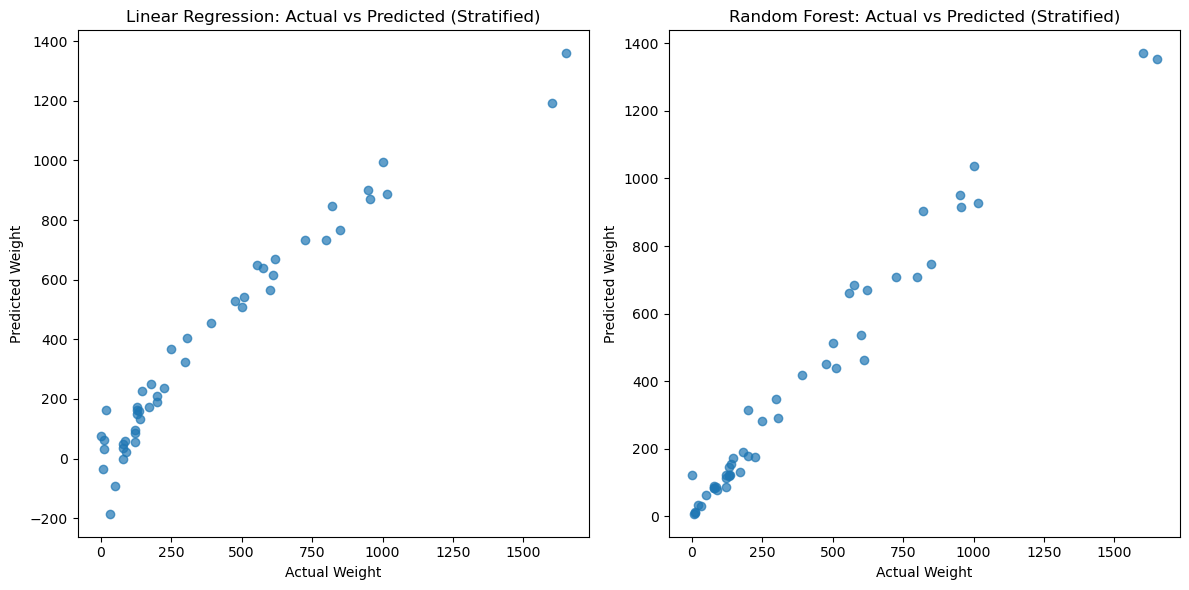

In [48]:
# Task 2.1: Stratified Split
# Ensure each species has 70% in training set and 30% in test set
data_combined = data.copy()
data_combined['Weight'] = y

# Stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(data_combined, data_combined['Species']):
    strat_train_set = data_combined.loc[train_index]
    strat_test_set = data_combined.loc[test_index]

# Separate features and target
X_train_strat = strat_train_set.drop('Weight', axis=1)
y_train_strat = strat_train_set['Weight']
X_test_strat = strat_test_set.drop('Weight', axis=1)
y_test_strat = strat_test_set['Weight']

# One-hot encode the categorical variable 'Species'
X_train_strat = pd.get_dummies(X_train_strat, columns=['Species'], drop_first=True)
X_test_strat = pd.get_dummies(X_test_strat, columns=['Species'], drop_first=True)

# Task 2.2: Applying Models
# Linear Regression with stratified split
linear_regressor.fit(X_train_strat, y_train_strat)
y_pred_lr_strat = linear_regressor.predict(X_test_strat)

# Random Forest with stratified split
rf_regressor.fit(X_train_strat, y_train_strat)
y_pred_rf_strat = rf_regressor.predict(X_test_strat)

# Task 2.3: Calculate RMSE and R2
# Linear Regression metrics with stratified split
rmse_lr_strat = np.sqrt(mean_squared_error(y_test_strat, y_pred_lr_strat))
r2_lr_strat = r2_score(y_test_strat, y_pred_lr_strat)

# Random Forest metrics with stratified split
rmse_rf_strat = np.sqrt(mean_squared_error(y_test_strat, y_pred_rf_strat))
r2_rf_strat = r2_score(y_test_strat, y_pred_rf_strat)

print(f"Linear Regression (Stratified) - RMSE: {rmse_lr_strat}, R2: {r2_lr_strat}")
print(f"Random Forest (Stratified) - RMSE: {rmse_rf_strat}, R2: {r2_rf_strat}")

# Task 2.4: Visualize Predictions
# Visualizing Linear Regression predictions with stratified split
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_strat, y_pred_lr_strat, alpha=0.7)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Linear Regression: Actual vs Predicted (Stratified)')

# Visualizing Random Forest predictions with stratified split
plt.subplot(1, 2, 2)
plt.scatter(y_test_strat, y_pred_rf_strat, alpha=0.7)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest: Actual vs Predicted (Stratified)')

plt.tight_layout()
plt.show()

Comparison: Compare the results obtained from Task 1 and Task 2.

After a few (about 10) test runs, I come to the conclusion that Task 2 is likely to show worse performance than Task 1 in terms of RMSE and R² due to the nature of the stratified split based on species. 

Reasons Task 2 Might Show Worse Performance:
1. Limited training data per species
In Task 2, the dataset is split to ensure each species has 70% of its samples in the training set and 30% in the test set. This stratified split can lead to smaller training datasets for some species, especially those with fewer observations initially. Limited data can reduce the model's ability to learn effectively, resulting in poorer predictive performance.
2. Variability in species characteristics
Fish species may vary significantly in their physical characteristics (length, width, height), which directly impact their weight. If the training set for certain species does not adequately represent the full range of their characteristics, the model may struggle to generalize to unseen data (test set), leading to higher RMSE and lower R².
3. Complexity of species-specific relationships
Fish weight prediction might involve species-specific relationships that are not captured well with a stratified split approach. A model trained on a mixed dataset (Task 1) might generalize better by learning from the overall distribution of fish characteristics and their corresponding weights, rather than being constrained to smaller, species-specific datasets.
4. Overfitting/ Underfitting
The stratified split in Task 2 could potentially lead to overfitting or underfitting for certain species if the model's complexity (number of features, model type) is not adjusted accordingly. Overfitting occurs when the model learns noise in the training data, while underfitting occurs when the model is too simplistic to capture the underlying patterns.

Extra Point: Point out which parameters can be adjusted in this exercise to improve model performance.

To improve model performance, we can adjust the following parameters:

Features:
- Create additional features or interactions between features.
- Normalize or standardize the features.

Hyperparameter Tuning:
- For Linear Regression: Regularization parameters like Lasso or Ridge can be adjusted.
- For Random Forest: Number of trees (n_estimators), maximum depth of the trees (max_depth), minimum samples required to split a node (min_samples_split), etc.

Model Ensemble:
- Combine multiple models (e.g., using a stacking or boosting approach)
- For example: Support Vector Machines (SVR), Gradient Boosting Regression or XGBoost (eXtreme Gradient Boosting)

Cross-Validation:
- Use cross-validation techniques to ensure that the model generalizes well to unseen data

Error Analysis:
- Analyze the errors made by the model to identify any patterns or biases. This can help guide further feature engineering or model selection.
